In [ ]:
!pip install gtts gradio roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 802.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58

In [ ]:
import os
HOME = os.getcwd()

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 5.17 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt
!ls -la {HOME}/weights

total 402448
drwxr-xr-x 2 root root      4096 Oct  9 02:37 .
drwxr-xr-x 1 root root      4096 Oct  9 02:37 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XdP8NQpTT2okkMBxTP0r")
project = rf.workspace("ai-camp-fzpy0").project("pill-detectr")
version = project.version(2)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pill-detectr-2 in yolov9:: 100%|██████████| 2714/2714 [00:01<00:00, 2197.54it/s]


In [ ]:
%cd {HOME}/yolov9
!python train.py \
--batch 16 --epochs 50 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-10-09 02:37:37.124253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 02:37:37.144009: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 02:37:37.149810: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 02:37:37.163736: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 02:37:38.355581: W tensorf

In [ ]:
!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

val: data=/content/yolov9/pill-detectr-2/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could

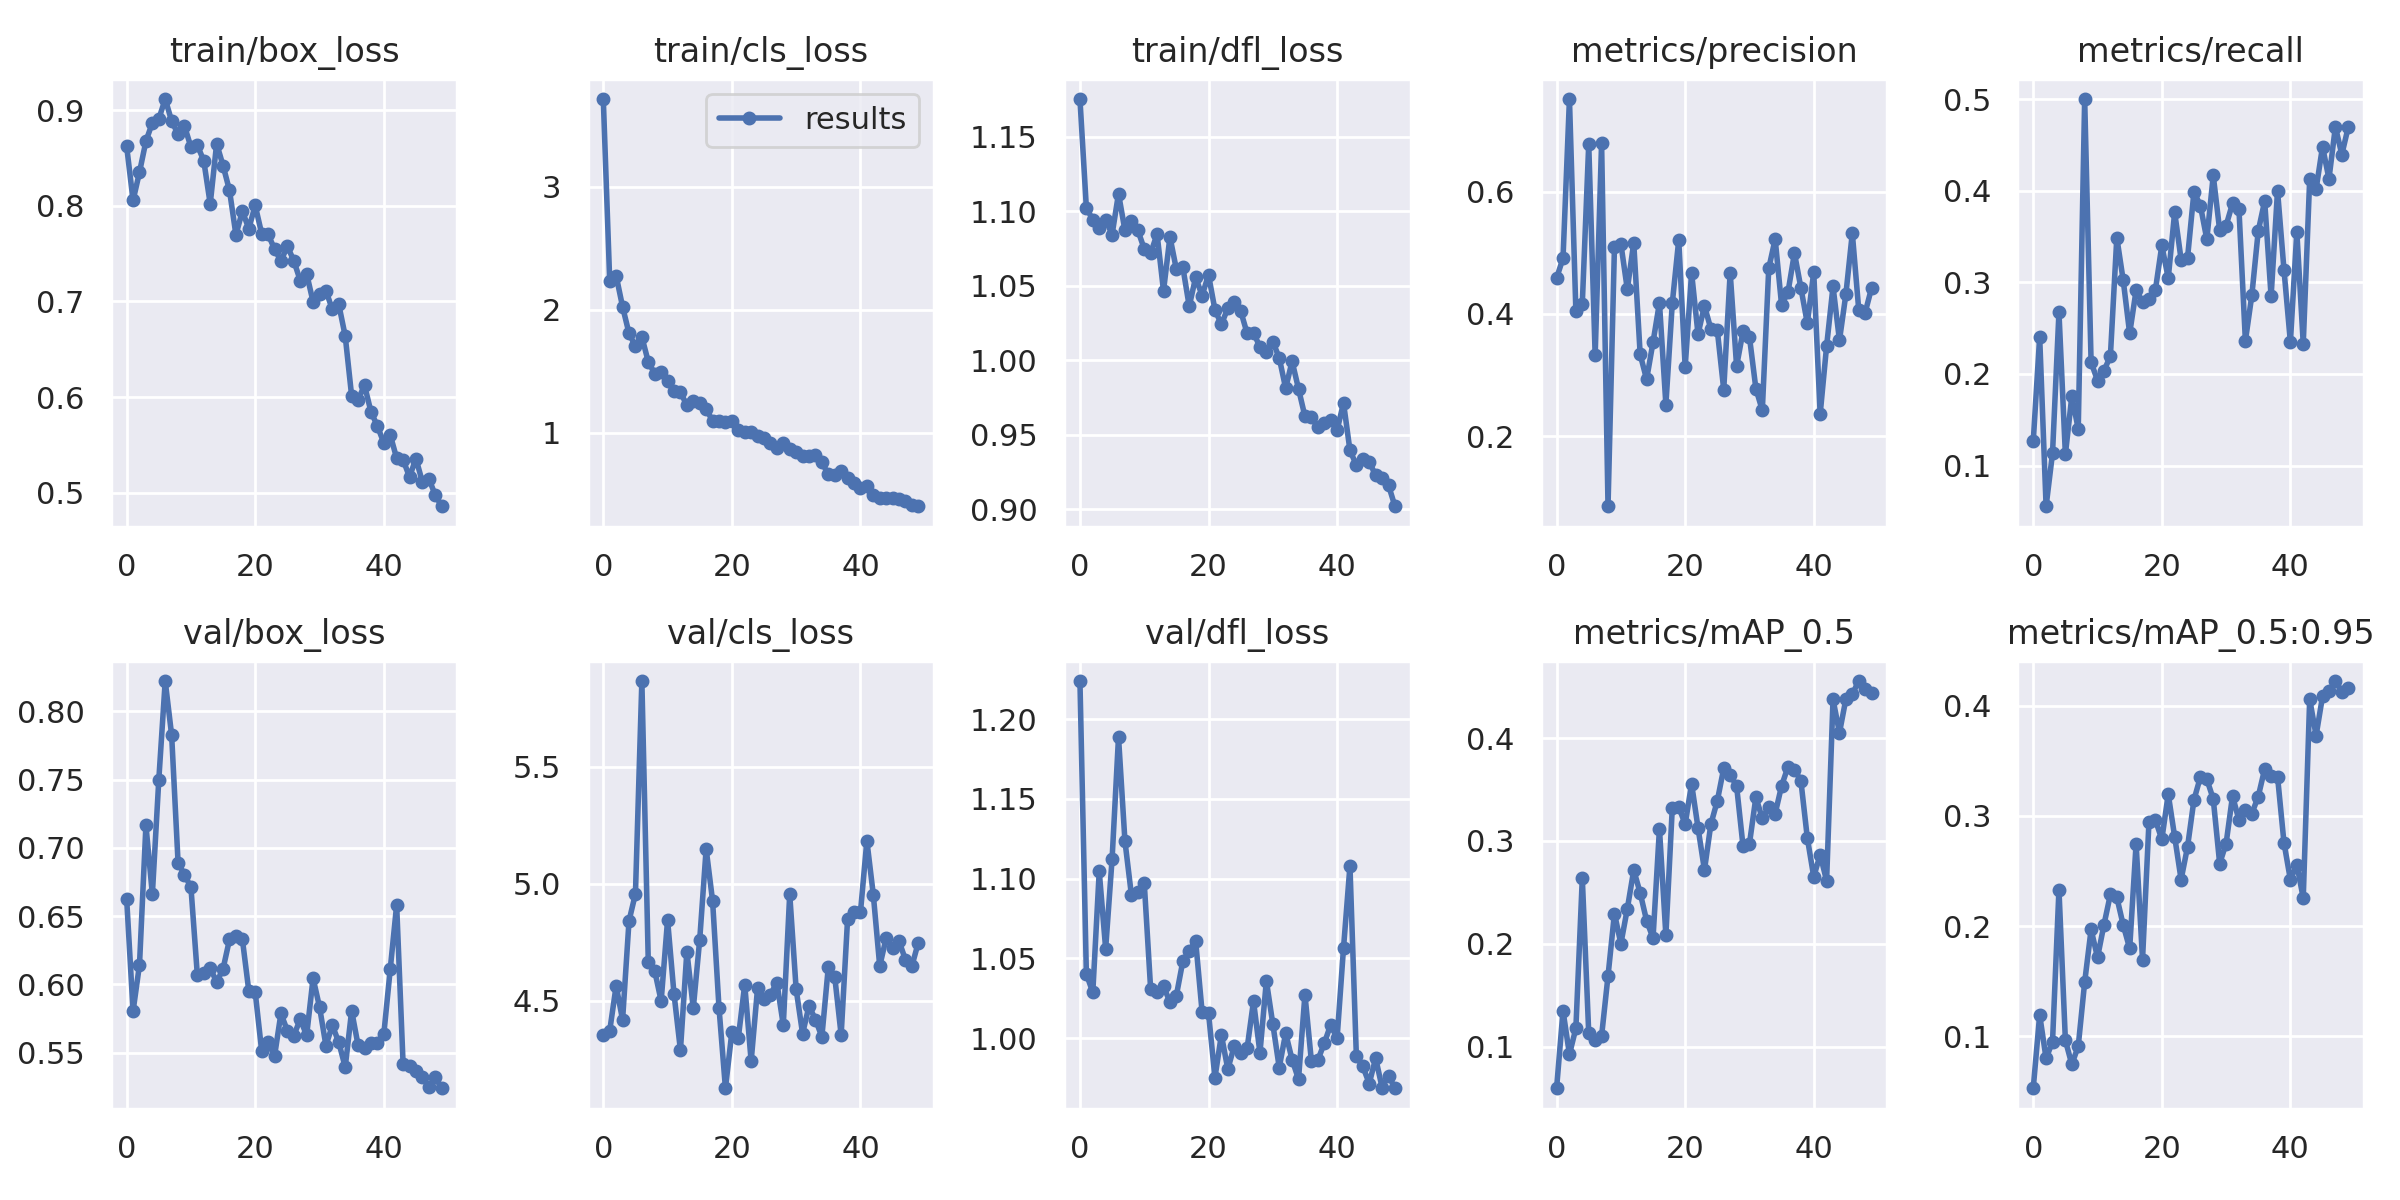

In [ ]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

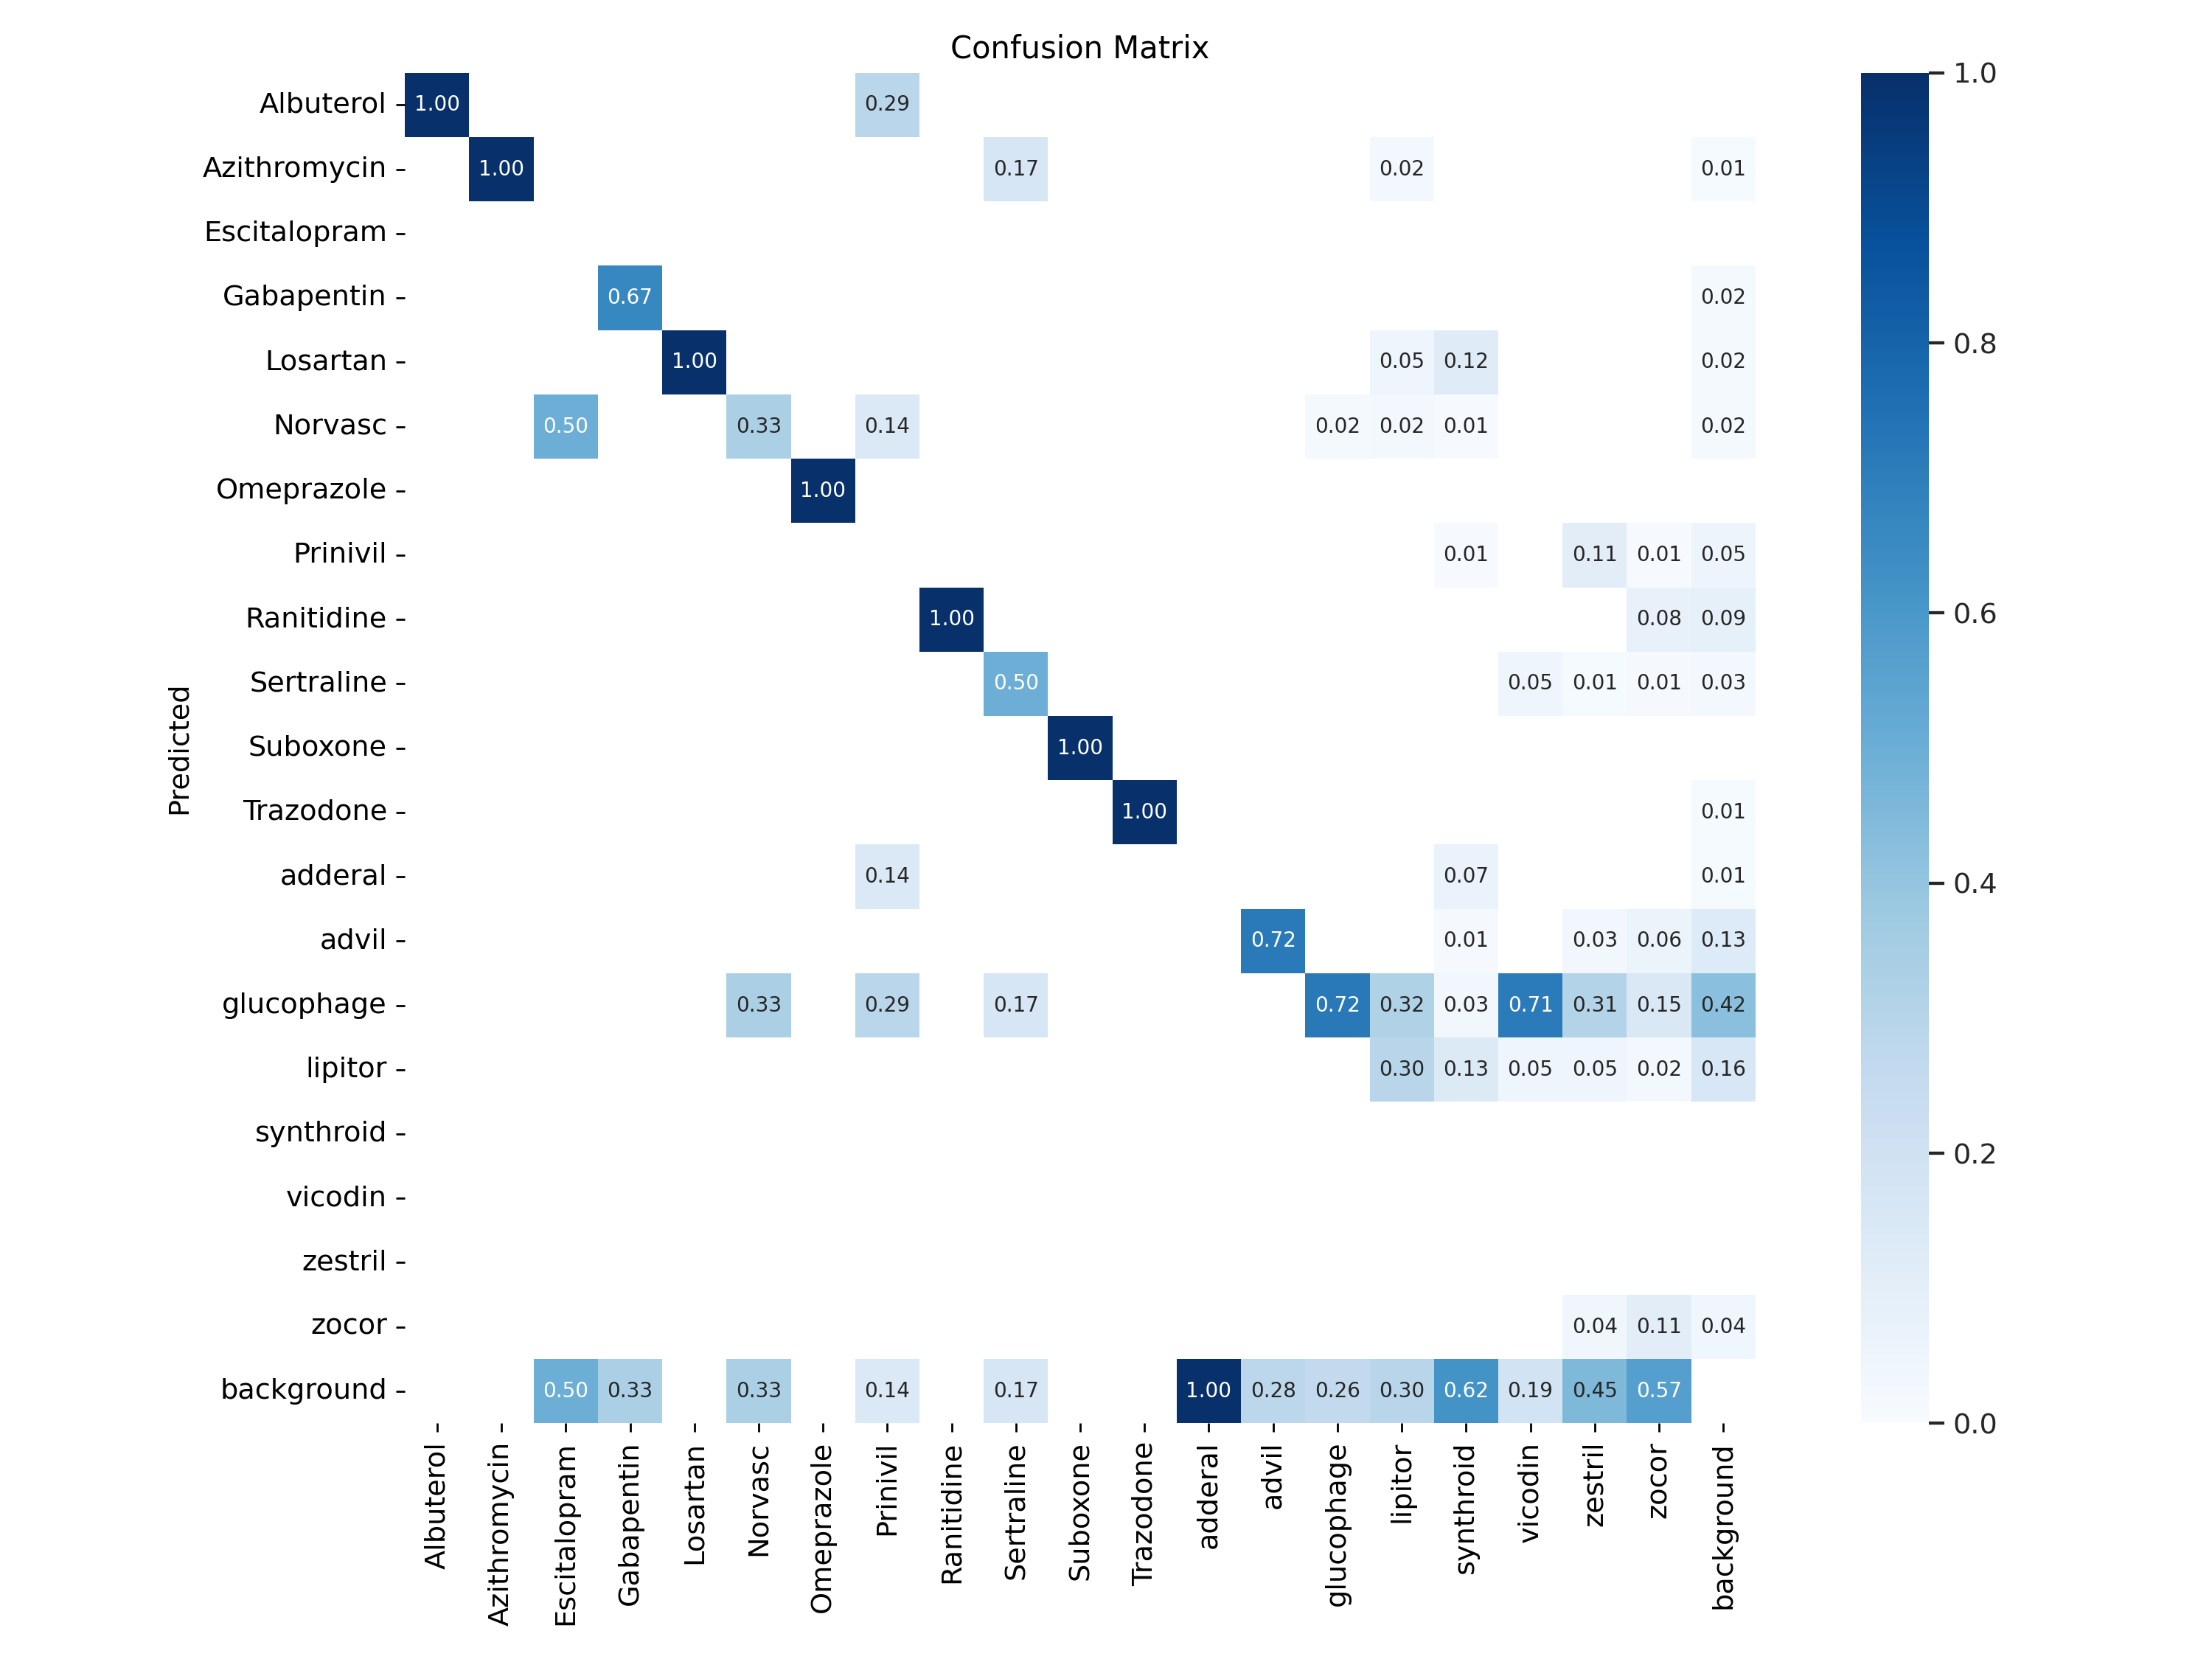

In [ ]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

In [ ]:
import gradio as gr
import subprocess
import os
from PIL import Image

# Define paths
weights_path = "/content/yolov9/runs/train/exp/weights/best.pt"  # Update with your weights path
results_base_dir = "/content/yolov9/runs/detect"
uploaded_image_path = "/content/yolov9/uploaded_image.jpg"

def detect_objects(image):
    # Save the uploaded image locally
    image.save(uploaded_image_path)

    # Run YOLOv9 detection
    command = f"python /content/yolov9/detect.py --weights {weights_path} --conf 0.1 --source {uploaded_image_path} --device 0"
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()

    # Print stdout and stderr for debugging
    print(f"Detection stdout: {stdout.decode('utf-8')}")
    if stderr:
        print(f"Detection stderr: {stderr.decode('utf-8')}")

    # Get the latest experiment directory
    def get_latest_exp_dir(base_dir):
        exp_dirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
        if not exp_dirs:
            return None
        return max(exp_dirs, key=os.path.getmtime)

    latest_exp_dir = get_latest_exp_dir(results_base_dir)
    if not latest_exp_dir:
        print("No experiment directories found.")
        return Image.new('RGB', (640, 640), color='white')  # Return a blank image if no exp dir

    output_image_path = os.path.join(latest_exp_dir, "uploaded_image.jpg")

    # Print the path to debug
    print(f"Checking for result image at: {output_image_path}")

    # Check if the result image is saved
    if os.path.exists(output_image_path):
        result_image = Image.open(output_image_path)
        return result_image
    else:
        print("Result image not found.")
        return Image.new('RGB', (640, 640), color='white')  # Return a blank image if no result image

# Gradio interface
interface = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="pil", label="Upload an Image"),
    outputs="image",
    title="YOLOv9 Object Detection",
    description="Upload an image and get object detection results."
)

interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f5b8329f06cb4d0df3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install gtts gradio

In [ ]:
from gtts import gTTS
import os
import gradio as gr
from PIL import Image as PILImage
import glob

In [ ]:
!pip install SpeechRecognition


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 53.9 MB/s eta 0:00:00


In [ ]:
!pip install gtts SpeechRecognition Pillow


In [ ]:
# Install necessary packages
!pip install SpeechRecognition gtts sounddevice numpy

import os
import time
import gtts
import speech_recognition as sr
import sounddevice as sd
import numpy as np
import IPython.display as ipd

# Function to convert text to Marathi speech
def text_to_marathi_speech(response):
    tts = gtts.gTTS(response, lang='mr')
    tts.save("response.mp3")
    ipd.display(ipd.Audio("response.mp3", autoplay=True))

# Function to record audio input
def recognize_voice():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("कृपया तुमचा प्रश्न सांगा:")  # Prompt user to speak
        audio = r.listen(source)  # Listen for the user's input
        print("अभ्यास घेत आहे...")  # Processing the input

        try:
            recognized_text = r.recognize_google(audio, language='mr-IN')
            print(f"तुमचा प्रश्न: {recognized_text}")  # Print recognized text
            return recognized_text
        except sr.UnknownValueError:
            print("माझ्यासाठी तुमचा आवाज समजला नाही.")  # Voice not recognized
            return None
        except sr.RequestError as e:
            print(f"सर्व्हरशी संपर्क साधता आला नाही: {e}")  # Error in connection
            return None

# Function to simulate medicine detection and provide a response
def chat_with_voice_bot():
    welcome_message = "स्वागत आहे! तुमचा औषधाबद्दलचा प्रश्न विचारा."  # Welcome message
    text_to_marathi_speech(welcome_message)

    while True:
        user_query = recognize_voice()

        if user_query:
            # Simulate a response (You can add real medicine detection logic here)
            if "नॉरवॅस्क" in user_query:
                response = "ही औषधी नॉरवॅस्क आहे. ही उच्च रक्तदाब साठी वापरली जाते."  # Response for Norvasc
            else:
                response = "माझ्या माहितीनुसार, मी तुम्हाला मदत करू शकत नाही."  # Default response

            text_to_marathi_speech(response)  # Convert response to speech

        # Add a small delay before next input
        time.sleep(1)

# Start the chatbot
chat_with_voice_bot()


OSError: PortAudio library not found

In [ ]:
!pip install SpeechRecognition gtts sounddevice numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 45.3 MB/s eta 0:00:00


In [ ]:
import os
import time
import gtts
import speech_recognition as sr
import sounddevice as sd
import numpy as np
import IPython.display as ipd

# Function to convert text to Marathi speech
def text_to_marathi_speech(response):
    tts = gtts.gTTS(response, lang='mr')
    tts.save("response.mp3")
    os.system("start response.mp3")  # Play the audio response

# Function to recognize audio input
def recognize_voice():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("कृपया तुमचा प्रश्न सांगा:")  # Prompt user to speak
        audio = r.listen(source)  # Listen for the user's input
        print("अभ्यास घेत आहे...")  # Processing the input

        try:
            recognized_text = r.recognize_google(audio, language='mr-IN')
            print(f"तुमचा प्रश्न: {recognized_text}")  # Print recognized text
            return recognized_text
        except sr.UnknownValueError:
            print("माझ्यासाठी तुमचा आवाज समजला नाही.")  # Voice not recognized
            return None
        except sr.RequestError as e:
            print(f"सर्व्हरशी संपर्क साधता आला नाही: {e}")  # Error in connection
            return None

# Function to simulate medicine detection and provide response
def chat_with_voice_bot():
    welcome_message = "स्वागत आहे! तुमचा औषधाबद्दलचा प्रश्न विचारा."  # Welcome message
    text_to_marathi_speech(welcome_message)

    while True:
        user_query = recognize_voice()

        if user_query:
            # Simulate a response (You can add real medicine detection logic here)
            if "नॉरवॅस्क" in user_query:
                response = "ही औषधी नॉरवॅस्क आहे. ही उच्च रक्तदाब साठी वापरली जाते."  # Response for Norvasc
            else:
                response = "माझ्या माहितीनुसार, मी तुम्हाला मदत करू शकत नाही."  # Default response

            text_to_marathi_speech(response)  # Convert response to speech

        # Add a small delay before next input
        time.sleep(1)

# Start the chatbot
chat_with_voice_bot()


OSError: PortAudio library not found

In [ ]:
from gtts import gTTS
import os
import gradio as gr
from PIL import Image as PILImage
import glob
from IPython.display import Audio, display

In [ ]:
import gradio as gr
from gtts import gTTS
import speech_recognition as sr
import os

# Function for converting text to speech
def text_to_speech(text):
    tts = gTTS(text=text, lang='mr')  # Marathi language
    audio_file = "output.mp3"
    tts.save(audio_file)
    return audio_file

# Simulated medicine data
medicines_info = {
    "Norvasc": {
        "usage": "हे औषध रक्तदाब नियंत्रणासाठी वापरले जाते.",
        "side_effects": "सामान्य दुष्परिणामांमध्ये चक्कर येणे, थकवा, आणि श्वास घेण्यास त्रास होणे यांचा समावेश आहे."
    }
}

# Global variable to hold the detected medicine
detected_medicine = None

# Step 1: Detect medicine and respond with its uses
def detect_medicine(image):
    global detected_medicine  # Use the global variable
    # Simulated medicine detection (replace with actual detection logic)
    detected_medicine = "Norvasc"  # Example detected medicine
    usage_info = medicines_info[detected_medicine]["usage"]  # Usage info in Marathi

    # Prepare response
    response = f"आढळलेला पदार्थ: {detected_medicine}. {usage_info}."
    audio_file_usage = text_to_speech(usage_info)  # Generate audio for the uses

    return response, audio_file_usage  # Return response and audio for uses

# Step 2: Handle user questions
def handle_user_question(audio_input):
    global detected_medicine  # Access the global variable
    # Convert audio input to text
    recognizer = sr.Recognizer()

    try:
        with sr.AudioFile(audio_input) as source:
            audio_data = recognizer.record(source)
            question = recognizer.recognize_google(audio_data, language='mr')  # Marathi language
    except sr.UnknownValueError:
        return "कृपया पुन्हा प्रयत्न करा. तुमचा आवाज समजला नाही.", None  # "Please try again. Your voice was not understood."
    except sr.RequestError as e:
        return f"गूगल स्पीच रेकग्निशन सेवा उपलब्ध नाही; {e}", None  # "Google Speech Recognition service is not available."

    # Check if the recognized question contains keywords for side effects
    if "दुष्परिणाम" in question:  # 'दुष्परिणाम' means 'side effects' in Marathi
        side_effects = medicines_info[detected_medicine]["side_effects"]  # Get side effects for the detected medicine
        response = f"{detected_medicine} च्या दुष्परिणामांमध्ये: {side_effects}."
        audio_file_side_effects = text_to_speech(side_effects)  # Generate audio for side effects
    else:
        response = "क्षमस्व, मला त्या प्रश्नाचे उत्तर माहित नाही."  # "Sorry, I do not know the answer to that question."
        audio_file_side_effects = None  # No audio for unknown question

    return response, audio_file_side_effects  # Return the text response and audio for side effects

# Main function to manage flow
def main_step1(image):
    if image is not None:
        # Step 1: Detect medicine and respond with uses
        response, audio_file_usage = detect_medicine(image)
        return response, audio_file_usage  # Return response and audio for uses
    return "", None  # Default return

def main_step2(audio_input):
    if audio_input is not None:
        # Step 2: Handle user question
        question_response, question_audio = handle_user_question(audio_input)
        return question_response, question_audio  # Respond to the user's question
    return "", None  # Default return

# Set up the Gradio interface
with gr.Blocks() as iface:
    with gr.Row():
        medicine_image = gr.Image(type="numpy", label="Upload Medicine Image")  # Input for image
        detect_button = gr.Button("Detect Medicine")  # Button to trigger detection
    with gr.Row():
        output_text = gr.Textbox(label="Medicine Information", interactive=False)  # Text response for uses
        output_audio_usage = gr.Audio(label="Voice Response for Uses", interactive=False)  # Audio response for the uses

    detect_button.click(fn=main_step1, inputs=medicine_image, outputs=[output_text, output_audio_usage])

    # Additional input for audio question after detection
    audio_input = gr.Audio(type="filepath", label="Ask a question about the medicine")  # Second input for audio
    ask_question_button = gr.Button("Ask Question")  # Button to trigger question processing
    output_text_question = gr.Textbox(label="Response to Question", interactive=False)  # Text response for side effects
    output_audio_side_effects = gr.Audio(label="Voice Response for Side Effects", interactive=False)  # Audio response for the side effects

    ask_question_button.click(fn=main_step2, inputs=audio_input, outputs=[output_text_question, output_audio_side_effects])

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bdeaee5e7d97383ec9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from gtts import gTTS
import speech_recognition as sr
import torch
from models.common import DetectMultiBackend
from utils.datasets import LoadImages
from utils.general import non_max_suppression, scale_coords
from utils.torch_utils import select_device
import os

# Set up model and paths
HOME = os.getcwd()
YOLOV9_PATH = os.path.join(HOME, 'yolov9')
WEIGHTS_PATH = os.path.join(YOLOV9_PATH, 'runs/train/exp/weights/best.pt')  # Adjust this to your trained model weights path

device = select_device('0')
model = DetectMultiBackend(WEIGHTS_PATH, device=device, dnn=False, data=None)

# Function for converting text to speech
def text_to_speech(text):
    tts = gTTS(text=text, lang='mr')  # Marathi language
    audio_file = "output.mp3"
    tts.save(audio_file)
    return audio_file

# Simulated medicine data
medicines_info = {
    "Norvasc": {
        "usage": "हे औषध रक्तदाब नियंत्रणासाठी वापरले जाते.",
        "side_effects": "सामान्य दुष्परिणामांमध्ये चक्कर येणे, थकवा, आणि श्वास घेण्यास त्रास होणे यांचा समावेश आहे."
    },
    "Aspirin": {
        "usage": "हे औषध वेदना कमी करण्यासाठी आणि रक्त पातळ करण्यासाठी वापरले जाते.",
        "side_effects": "सामान्य दुष्परिणामांमध्ये पोटात दुखणे, अपचन, आणि रक्तस्त्रावाचा धोका वाढणे यांचा समावेश आहे."
    }
}

# Global variable to hold the detected medicine
detected_medicine = None

# Step 1: Detect medicine and respond with its uses
def detect_medicine(image):
    global detected_medicine  # Use the global variable
    # Save the uploaded image
    source = os.path.join(HOME, 'temp.jpg')
    image.save(source)

    # Use YOLOv9 model to detect the medicine
    dataset = LoadImages(source, img_size=640)
    model.warmup(imgsz=(1, 3, *dataset.img_size))

    for path, img, im0s, vid_cap, s in dataset:
        img = torch.from_numpy(img).to(device)
        img = img.float() / 255.0
        if len(img.shape) == 3:
            img = img[None]

        pred = model(img)
        pred = non_max_suppression(pred, 0.25, 0.45)

        # Process detections
        for i, det in enumerate(pred):
            if len(det):
                det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0s.shape).round()

                for *xyxy, conf, cls in det:
                    detected_medicine = model.names[int(cls)]  # Get class label (medicine name)
                    break

    if detected_medicine and detected_medicine in medicines_info:
        usage_info = medicines_info[detected_medicine]["usage"]  # Usage info in Marathi
        response = f"आढळलेला पदार्थ: {detected_medicine}. {usage_info}."
        audio_file_usage = text_to_speech(usage_info)  # Generate audio for the uses
        return response, audio_file_usage  # Return response and audio for uses
    else:
        return "मला औषध ओळखता आले नाही.", None  # "I couldn't identify the medicine."

# Step 2: Handle user questions
def handle_user_question(audio_input):
    global detected_medicine  # Access the global variable
    # Convert audio input to text
    recognizer = sr.Recognizer()

    try:
        with sr.AudioFile(audio_input) as source:
            audio_data = recognizer.record(source)
            question = recognizer.recognize_google(audio_data, language='mr')  # Marathi language
    except sr.UnknownValueError:
        return "कृपया पुन्हा प्रयत्न करा. तुमचा आवाज समजला नाही.", None  # "Please try again. Your voice was not understood."
    except sr.RequestError as e:
        return f"गूगल स्पीच रेकग्निशन सेवा उपलब्ध नाही; {e}", None  # "Google Speech Recognition service is not available."

    # Check if the recognized question contains keywords for side effects
    if detected_medicine and "दुष्परिणाम" in question:  # 'दुष्परिणाम' means 'side effects' in Marathi
        side_effects = medicines_info[detected_medicine]["side_effects"]  # Get side effects for the detected medicine
        response = f"{detected_medicine} च्या दुष्परिणामांमध्ये: {side_effects}."
        audio_file_side_effects = text_to_speech(side_effects)  # Generate audio for side effects
    else:
        response = "क्षमस्व, मला त्या प्रश्नाचे उत्तर माहित नाही."  # "Sorry, I do not know the answer to that question."
        audio_file_side_effects = None  # No audio for unknown question

    return response, audio_file_side_effects  # Return the text response and audio for side effects

# Main function to manage flow
def main_step1(image):
    if image is not None:
        # Step 1: Detect medicine and respond with uses
        response, audio_file_usage = detect_medicine(image)
        return response, audio_file_usage  # Return response and audio for uses
    return "", None  # Default return

def main_step2(audio_input):
    if audio_input is not None:
        # Step 2: Handle user question
        question_response, question_audio = handle_user_question(audio_input)
        return question_response, question_audio  # Respond to the user's question
    return "", None  # Default return

# Set up the Gradio interface
with gr.Blocks() as iface:
    with gr.Row():
        medicine_image = gr.Image(type="pil", label="Upload Medicine Image")  # Input for image
        detect_button = gr.Button("Detect Medicine")  # Button to trigger detection
    with gr.Row():
        output_text = gr.Textbox(label="Medicine Information", interactive=False)  # Text response for uses
        output_audio_usage = gr.Audio(label="Voice Response for Uses", interactive=False)  # Audio response for the uses

    detect_button.click(fn=main_step1, inputs=medicine_image, outputs=[output_text, output_audio_usage])

    # Additional input for audio question after detection
    audio_input = gr.Audio(type="filepath", label="Ask a question about the medicine")  # Second input for audio
    ask_question_button = gr.Button("Ask Question")  # Button to trigger question processing
    output_text_question = gr.Textbox(label="Response to Question", interactive=False)  # Text response for side effects
    output_audio_side_effects = gr.Audio(label="Voice Response for Side Effects", interactive=False)  # Audio response for the side effects

    ask_question_button.click(fn=main_step2, inputs=audio_input, outputs=[output_text_question, output_audio_side_effects])

# Launch the interface
iface.launch()


ModuleNotFoundError: No module named 'utils.datasets'

In [ ]:
import gradio as gr
from gtts import gTTS
import speech_recognition as sr
import os

# Function for converting text to speech
def text_to_speech(text):
    tts = gTTS(text=text, lang='mr')  # Marathi language
    audio_file = "output.mp3"
    tts.save(audio_file)
    return audio_file

# Simulated medicine data
medicines_info = {
    "Norvasc": {
        "usage": "हे औषध रक्तदाब नियंत्रणासाठी वापरले जाते.",
        "side_effects": "सामान्य दुष्परिणामांमध्ये चक्कर येणे, थकवा, आणि श्वास घेण्यास त्रास होणे यांचा समावेश आहे."
    },
    "Azithromycin": {
        "usage": "हे औषध जीवाणू संक्रमणाच्या उपचारांसाठी वापरले जाते.",
        "side_effects": "सामान्य दुष्परिणामांमध्ये पोटदुखी, अतिसार, आणि उलटी येणे यांचा समावेश आहे."
    }
}

# Global variable to hold the detected medicine
detected_medicine = None

# Step 1: Detect medicine and respond with its uses
def detect_medicine(image):
    global detected_medicine  # Use the global variable
    # Simulated medicine detection (replace with actual detection logic)
    # Example logic to choose medicine based on image (use an ML model here)
    # Currently, we're simply alternating between Norvasc and Azithromycin
    detected_medicine = "Azithromycin" if image.sum() % 2 == 0 else "Norvasc"  # Example logic for simulation

    if detected_medicine in medicines_info:
        usage_info = medicines_info[detected_medicine]["usage"]  # Usage info in Marathi

        # Prepare response
        response = f"आढळलेला पदार्थ: {detected_medicine}. {usage_info}."
        audio_file_usage = text_to_speech(usage_info)  # Generate audio for the uses

        return response, audio_file_usage  # Return response and audio for uses
    else:
        return "आढळलेला पदार्थ ओळखला गेला नाही.", None  # "Detected medicine was not recognized."

# Step 2: Handle user questions
def handle_user_question(audio_input):
    global detected_medicine  # Access the global variable
    # Convert audio input to text
    recognizer = sr.Recognizer()

    try:
        with sr.AudioFile(audio_input) as source:
            audio_data = recognizer.record(source)
            question = recognizer.recognize_google(audio_data, language='mr')  # Marathi language
    except sr.UnknownValueError:
        return "कृपया पुन्हा प्रयत्न करा. तुमचा आवाज समजला नाही.", None  # "Please try again. Your voice was not understood."
    except sr.RequestError as e:
        return f"गूगल स्पीच रेकग्निशन सेवा उपलब्ध नाही; {e}", None  # "Google Speech Recognition service is not available."

    # Check if the recognized question contains keywords for side effects
    if "दुष्परिणाम" in question:  # 'दुष्परिणाम' means 'side effects' in Marathi
        if detected_medicine in medicines_info:
            side_effects = medicines_info[detected_medicine]["side_effects"]  # Get side effects for the detected medicine
            response = f"{detected_medicine} च्या दुष्परिणामांमध्ये: {side_effects}."
            audio_file_side_effects = text_to_speech(side_effects)  # Generate audio for side effects
        else:
            response = "क्षमस्व, मला त्या प्रश्नाचे उत्तर माहित नाही."  # "Sorry, I do not know the answer to that question."
            audio_file_side_effects = None  # No audio for unknown question
    else:
        response = "क्षमस्व, मला त्या प्रश्नाचे उत्तर माहित नाही."  # "Sorry, I do not know the answer to that question."
        audio_file_side_effects = None  # No audio for unknown question

    return response, audio_file_side_effects  # Return the text response and audio for side effects

# Main function to manage flow
def main_step1(image):
    if image is not None:
        # Step 1: Detect medicine and respond with uses
        response, audio_file_usage = detect_medicine(image)
        return response, audio_file_usage  # Return response and audio for uses
    return "", None  # Default return

def main_step2(audio_input):
    if audio_input is not None:
        # Step 2: Handle user question
        question_response, question_audio = handle_user_question(audio_input)
        return question_response, question_audio  # Respond to the user's question
    return "", None  # Default return

# Set up the Gradio interface
with gr.Blocks() as iface:
    with gr.Row():
        medicine_image = gr.Image(type="numpy", label="Upload Medicine Image")  # Input for image
        detect_button = gr.Button("Detect Medicine")  # Button to trigger detection
    with gr.Row():
        output_text = gr.Textbox(label="Medicine Information", interactive=False)  # Text response for uses
        output_audio_usage = gr.Audio(label="Voice Response for Uses", interactive=False)  # Audio response for the uses

    detect_button.click(fn=main_step1, inputs=medicine_image, outputs=[output_text, output_audio_usage])

    # Additional input for audio question after detection
    audio_input = gr.Audio(type="filepath", label="Ask a question about the medicine")  # Second input for audio
    ask_question_button = gr.Button("Ask Question")  # Button to trigger question processing
    output_text_question = gr.Textbox(label="Response to Question", interactive=False)  # Text response for side effects
    output_audio_side_effects = gr.Audio(label="Voice Response for Side Effects", interactive=False)  # Audio response for the side effects

    ask_question_button.click(fn=main_step2, inputs=audio_input, outputs=[output_text_question, output_audio_side_effects])

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1a3acaf41f649c93bc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
